# What does the last 100 ava on more than 7e5 ava looks like?

To have an idea of the propagation shape of the biggest avalanches in our system, we want to visualise the shape of the last 100 avalanches. This will also give us an idea on "Was it a good idea to change the box method to only grow one side of the box?"

#### Parameters:
L=256\
Nb ava = 6e7

#### Initial Condition:
Threshold: fixed to 1

#### Initial values:
Initialized to random values between 0 and 1

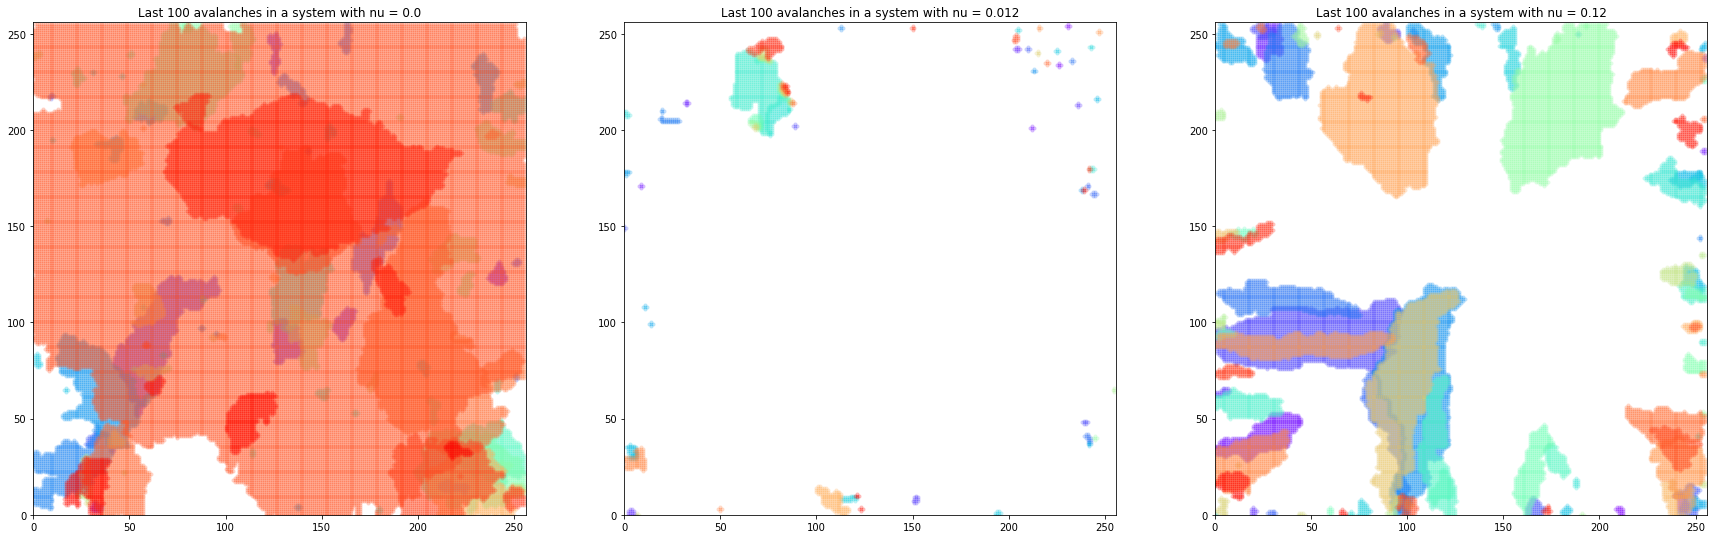

In [6]:
from pathlib import Path
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

def coorno(n):
    x1=n%L
    x2=n//L
    return (x1, x2)

path=Path(os.getcwd())
datapath=path.parent.absolute()
brutpath=f'{datapath}/Brut'

folderpath = f"{brutpath}/Shape/Sh"
ifolder = np.array([11,12,13])

dissipation = np.array([0,0.12,0.012])

L=256

plt.figure(figsize=(30,10)) 

for i in range(len(ifolder)):
    
    colors = iter(cm.rainbow(np.linspace(0, 1, 101)))
    file=f"{folderpath}{ifolder[i]}/shape_outputB.txt"
    shape = open(file, "r")
    #Les dissipations 2 et 3 ne sont pas dans l'ordre
    j=i+1
    if(i == 2):
        j = 3
    if(i == 3):
        j = 2 
    plt.subplot(1, 3, j)

    for line in shape:
        x1, x2 = [], []
        col = line.strip().split()
        for n in range(len(col)):
            x1_value, x2_value = coorno(int(col[n]))
            x1.append(x1_value)
            x2.append(x2_value)
        plt.scatter(x1,x2, s = 10, color = next(colors), alpha = 0.2)
        
    plt.axis([0, 256, 0, 256])
    j=i
    if(i == 1):
        j = 2
    if(i == 2):
        j = 1 
    plt.title(f"Last 100 avalanches in a system with nu = {dissipation[j]}")
    plt.gca().set_aspect('equal', adjustable='box')


plt.show()







## Conclusion:
The shape of avalanches is, much of the time, very elongated.

The initial position of avalanches seems to be much of the time on the edge of the system. This is in aggrement with "SELF-ORGANISED CRITICALITY, Pruessner, Gunnar p.113"